필요한 라이브러리 불러오기

판다스 버전 : 1.3.4<br>
BeautifulSoup 버전 : 4.10.0<br>
Selenium 버전 : 4.10.0

In [1]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4
# !pip install beautifulsoup4==4.10.0

In [2]:
# selenium을 설치합니다.
!pip install selenium==4.10.0

In [3]:
# 버전 확인용
import pandas as pd
import bs4
import selenium

print("판다스 버전 :", pd.__version__)
print("bs4 버전:", bs4.__version__)
print("selenium 버전:", selenium.__version__)

판다스 버전 : 1.3.4
bs4 버전: 4.10.0
selenium 버전: 4.10.0


In [4]:
"""라이브러리"""
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup
import time

import warnings
warnings.filterwarnings("ignore")

In [5]:
# chromedriver가 설치된 경로 넣기
service = Service(executable_path='C:/Users/it/Downloads/chromedriver-win64/chromedriver.exe') # 독자여러분의 환경에 맞는 경로를 넣어주세요!!!
driver = webdriver.Chrome(service=service)

In [6]:
page_url = "https://cafe.naver.com/remonterrace?iframe_url=/ArticleList.nhn%3Fsearch.clubid=10298136%26search.menuid=116%26search.boardtype=L%26search.totalCount=151%26search.cafeId=10298136%26search.page=2"

In [7]:
driver.get(page_url)
time.sleep(3)

In [8]:
driver.save_screenshot('현재화면.jpg')

True

HTML 수집과 파싱

In [9]:
html=driver.page_source

In [10]:
soup=BeautifulSoup(html, 'lxml')

<html lang="ko"><head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<title>미용,건강,다이어트 노하우,레몬테라스 [인테리어,리폼,DIY,요리,결혼,육아] : 네이버 카페</title>
<link href="/favicon.ico?2" rel="shortcut icon" type="image/x-icon"/>
<meta content="always" name="referrer"/>
<link href="/static/css/main/css/line_sticker-1644284985000-9453.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/comment-1644284985000-17199.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/map/cafe_map-1644284985000-14563.css" rel="stylesheet" type="text/css"/>
<style id="cafeCss" type="text/css">
</style>
<link href="/static/css/main/css/wide/1080_cafe-1703579508000-229750.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/wide/1080_skin_green-1644284985000-22150.css" rel="stylesheet" type="text/css"/>
<script>
var g_sUserId = "";
va
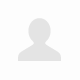
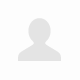

In [11]:
# 게시물 정보가 보이지 않는다.
soup

In [12]:
driver.switch_to.frame('cafe_main')

In [13]:
html=driver.page_source
soup=BeautifulSoup(html, 'lxml')

In [14]:
soup

<html lang="ko"><head>
<title>카페</title>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?2" rel="shortcut icon" type="image/x-icon"/>
<meta content="always" name="referrer"/>
<script>
var g_sUserId = "";
var g_sUserMemberKey = ""
var g_sGroupId = "false";
var g_sCafeHome = "https://cafe.naver.com/" + "remonterrace";
var g_sClubId = "10298136";
var g_mobileWebLink = "https://m.cafe.naver.com/remonterrace";

var g_sCafeThumbUrl = 'https://cafethumb.pstatic.net';
var g_sUpcafeUrl = 'https://up.cafe.naver.com';
var g_sCafeUrl = "https://cafe.naver.com";
var g_sCafeUrlOnly = "remonterrace";
var g_sCafeImgUrl = 'https://cafe.pstatic.net';
var g_sCafeFileUrl = 'https://cafefiles.pstatic.net';
var g_sLoginUrl = "http://nid.naver.com";
var g_sNidHttps = 'https://nid.naver.com';
var g_sCafeSectionUrl = "https://section.cafe.naver.com";

정보 수집

In [15]:
title_source = soup.select('td.td_article > div.board-list > div')
title_source[1]


<div class="inner_list">
<a class="article" href="/ArticleRead.nhn?clubid=10298136&amp;page=2&amp;menuid=116&amp;boardtype=L&amp;articleid=31964208&amp;referrerAllArticles=false" onclick="clickcr(this, 'gnr.title','','',event);">
                                
                                

                                
                                

                                
                                
                                    
                                    다이어트 정보 공유합니당 ㅎㅎ
                                    
                                
                            </a>
<a class="cmt" href="/ArticleRead.nhn?clubid=10298136&amp;page=2&amp;menuid=116&amp;boardtype=L&amp;articleid=31964208&amp;referrerAllArticles=false&amp;commentFocus=true" onclick="clickcr(this, 'gnr.cmt','','',event);">
                                    [<em>3</em>]
                                </a>
</div>

In [16]:
title_source[1].select('a.article')[0]

<a class="article" href="/ArticleRead.nhn?clubid=10298136&amp;page=2&amp;menuid=116&amp;boardtype=L&amp;articleid=31964208&amp;referrerAllArticles=false" onclick="clickcr(this, 'gnr.title','','',event);">
                                
                                

                                
                                

                                
                                
                                    
                                    다이어트 정보 공유합니당 ㅎㅎ
                                    
                                
                            </a>

In [17]:
title_source[1].select('a.article')[0].get_text().strip()

'다이어트 정보 공유합니당 ㅎㅎ'

In [18]:
title_source[1].select('a.cmt')

[<a class="cmt" href="/ArticleRead.nhn?clubid=10298136&amp;page=2&amp;menuid=116&amp;boardtype=L&amp;articleid=31964208&amp;referrerAllArticles=false&amp;commentFocus=true" onclick="clickcr(this, 'gnr.cmt','','',event);">
                                     [<em>3</em>]
                                 </a>]

In [19]:
title_source[1].select('a.cmt')[0].get_text().strip()

'[3]'

In [20]:
def getTitle_numReplys(soup):
    """포스팅 제목을 수집한다. 페이지 당 15개"""
    titles = []
    num_replys = []

    title_source = soup.select('td.td_article > div.board-list > div')

    for title in title_source:
        t = title.select('a.article')[0].get_text().strip()
        titles.append(t)

    for rep in title_source:
        try:
            num = rep.select('a.cmt')[0].get_text().strip()
            num_replys.append(num)
        except:
            num_replys.append([0])

    return titles, num_replys

In [21]:
views = soup.select('td.td_view')
views

[<td class="td_view">1,012</td>,
 <td class="td_view">304</td>,
 <td class="td_view">173</td>,
 <td class="td_view">86</td>,
 <td class="td_view">93</td>,
 <td class="td_view">15</td>,
 <td class="td_view">350</td>,
 <td class="td_view">85</td>,
 <td class="td_view">181</td>,
 <td class="td_view">42</td>,
 <td class="td_view">395</td>,
 <td class="td_view">266</td>,
 <td class="td_view">78</td>,
 <td class="td_view">68</td>,
 <td class="td_view">222</td>]

In [22]:
def getViews(soup):
    """포스팅 조회수를 수집한다. 페이지 당 15개"""
    views = [v.get_text() for v in soup.select('td.td_view')]

    return views

In [23]:
def getDates(soup):
    """포스팅 작성일을 수집한다. 페이지 당 15개"""
    dates = [d.get_text() for d in soup.select('td.td_date')]

    return dates

In [24]:
titles, num_replys = getTitle_numReplys(soup)
views = getViews(soup)
dates = getDates(soup)

In [25]:
print("첫 번째 게시물 제목 :", titles[0])
print("첫 번째 게시물 댓글수 :", num_replys[0])
print("첫 번째 게시물 조회수 :", views[0])
print("첫 번째 게시물 작성일 :", dates[0])

첫 번째 게시물 제목 : 충격적인 호박 🎃
첫 번째 게시물 댓글수 : [7]
첫 번째 게시물 조회수 : 1,012
첫 번째 게시물 작성일 : 2024.03.24.


In [26]:
Button1 = '//*[@id="main-area"]/div[6]/a[1]'
Button2 = '//*[@id="main-area"]/div[6]/a[2]'
Button3 = '//*[@id="main-area"]/div[6]/a[3]'
Button4 = '//*[@id="main-area"]/div[6]/a[4]'
Button5 = '//*[@id="main-area"]/div[6]/a[5]'
Button6 = '//*[@id="main-area"]/div[6]/a[6]'
Button7 = '//*[@id="main-area"]/div[6]/a[7]'
Button8 = '//*[@id="main-area"]/div[6]/a[8]'
Button9 = '//*[@id="main-area"]/div[6]/a[9]'
Button10 = '//*[@id="main-area"]/div[6]/a[10]'
ButtonNext = '//*[@id="main-area"]/div[6]/a[11]' #10페이지까지

Button11 = '//*[@id="main-area"]/div[6]/a[2]'
Button12 = '//*[@id="main-area"]/div[6]/a[3]'
Button13 = '//*[@id="main-area"]/div[6]/a[4]'
Button14 = '//*[@id="main-area"]/div[6]/a[5]'
Button15 = '//*[@id="main-area"]/div[6]/a[6]'
Button16 = '//*[@id="main-area"]/div[6]/a[7]'
Button17 = '//*[@id="main-area"]/div[6]/a[8]'
Button18 = '//*[@id="main-area"]/div[6]/a[9]'
Button19 = '//*[@id="main-area"]/div[6]/a[10]'
Button20 = '//*[@id="main-area"]/div[6]/a[11]'
ButtonNext_1 = '//*[@id="main-area"]/div[6]/a[12]'

Buttons_round1 = [Button2, Button3,Button4,Button5,Button6,Button7,Button8,Button9,Button10,ButtonNext]
Buttons_round2 = [Button11, Button12,Button13,Button14,Button15,Button16,Button17,Button18,Button19,Button20,ButtonNext_1]

## 전체 코드

In [27]:
# 전체 코드를 실행해야 데이터를 수집합니다. 위의 코드와 아주 약간 다릅니다.

"""라이브러리"""
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup
import time

import warnings
warnings.filterwarnings("ignore")

In [28]:
# chromedriver가 설치된 경로 넣기
service = Service(executable_path='C:/Users/it/Downloads/chromedriver-win64/chromedriver.exe')
driver = webdriver.Chrome(service=service)

In [29]:
Button1 = '//*[@id="main-area"]/div[6]/a[1]'
Button2 = '//*[@id="main-area"]/div[6]/a[2]'
Button3 = '//*[@id="main-area"]/div[6]/a[3]'
Button4 = '//*[@id="main-area"]/div[6]/a[4]'
Button5 = '//*[@id="main-area"]/div[6]/a[5]'
Button6 = '//*[@id="main-area"]/div[6]/a[6]'
Button7 = '//*[@id="main-area"]/div[6]/a[7]'
Button8 = '//*[@id="main-area"]/div[6]/a[8]'
Button9 = '//*[@id="main-area"]/div[6]/a[9]'
Button10 = '//*[@id="main-area"]/div[6]/a[10]'
ButtonNext = '//*[@id="main-area"]/div[6]/a[11]' #10페이지까지

Button11 = '//*[@id="main-area"]/div[6]/a[2]'
Button12 = '//*[@id="main-area"]/div[6]/a[3]'
Button13 = '//*[@id="main-area"]/div[6]/a[4]'
Button14 = '//*[@id="main-area"]/div[6]/a[5]'
Button15 = '//*[@id="main-area"]/div[6]/a[6]'
Button16 = '//*[@id="main-area"]/div[6]/a[7]'
Button17 = '//*[@id="main-area"]/div[6]/a[8]'
Button18 = '//*[@id="main-area"]/div[6]/a[9]'
Button19 = '//*[@id="main-area"]/div[6]/a[10]'
Button20 = '//*[@id="main-area"]/div[6]/a[11]'
ButtonNext_1 = '//*[@id="main-area"]/div[6]/a[12]'

Buttons_round1 = [Button2, Button3,Button4,Button5,Button6,Button7,Button8,Button9,Button10,ButtonNext]
Buttons_round2 = [Button11, Button12,Button13,Button14,Button15,Button16,Button17,Button18,Button19,Button20,ButtonNext_1]

In [30]:
page_url = "https://cafe.naver.com/remonterrace?iframe_url=/ArticleList.nhn%3Fsearch.clubid=10298136%26search.menuid=116%26search.boardtype=L%26search.totalCount=151%26search.cafeId=10298136%26search.page=2"

In [31]:
driver.get(page_url) #①
time.sleep(3) #②

driver.switch_to.frame('cafe_main') #③

all_titles = [] #④
all_num_replys = [] #⑤
all_views = [] #⑥
all_dates = [] #⑦

# 1페이지부터 10페이지까지 수집
for click in Buttons_round1:
    driver.find_element(By.XPATH, click).click() #⑧
    time.sleep(2)

    html=driver.page_source
    soup=BeautifulSoup(html, 'lxml')

    titles, num_replys = getTitle_numReplys(soup)
    views = getViews(soup)
    dates = getDates(soup)

    all_titles.append(titles)
    all_num_replys.append(num_replys)
    all_views.append(views)
    all_dates.append(dates)

#11페이지부터 131페이지까지 수집
cnt = 0
while(cnt<12): #⑨
    print("수집 중")

    for click in Buttons_round2:
        driver.find_element(By.XPATH, click).click()
        time.sleep(2)

        html=driver.page_source
        soup=BeautifulSoup(html, 'lxml')

        titles, num_replys = getTitle_numReplys(soup)
        views = getViews(soup)
        dates = getDates(soup)

        all_titles.append(titles)
        all_num_replys.append(num_replys)
        all_views.append(views)
        all_dates.append(dates)

    cnt += 1 #⑩

수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중
수집 중


#### 데이터 전처리 및 저장

In [32]:
import re

In [33]:
all_titles_ = sum(all_titles, [])
all_num_replys_ = sum(all_num_replys, [])
all_views_ = sum(all_views, [])
all_dates_ = sum(all_dates, [])

In [34]:
df = pd.DataFrame({"title":all_titles_, "replys":all_num_replys_, "views":all_views_, "date":all_dates_})

In [35]:
df['replys'] = df['replys'].astype("str")
df['replys'] = df['replys'].apply(lambda x:re.findall("\d+", x)[0])

In [36]:
df.head()

,title,replys,views,date
0,충격적인 호박 🎃,7,"1,012",2024.03.24.
1,다이어트 정보 공유합니당 ㅎㅎ,3,304,2024.03.23.
2,출산후 지루성두피..ㅠ,4,173,2024.03.23.
3,쌍거풀 라인교정?,0,86,2024.03.23.
4,남자 갱년기는 어떤 치료나 보조제있을까요.,3,93,2024.03.23.


결과 저장하기

In [37]:
filepath = './data'
df.to_excel(filepath + "/레몬테라스_포스팅_데이터.xlsx", index=False)

In [38]:
driver.close() # 가상 드라이버 종료